In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar dataset de forma optimizada
chunk_size = 100000
filtered_chunks = []
for chunk in pd.read_csv("processed_chessData.csv", chunksize=chunk_size):
    chunk = chunk[chunk["FullmoveCounter"] <= 25]
    filtered_chunks.append(chunk)
    if sum(len(c) for c in filtered_chunks) >= 1000000:
        break

# Reducir tamaño del dataset a 1,000,000 datos balanceados
dataset_sampled1 = pd.concat(filtered_chunks).sample(n=50000, random_state=42)
dataset_sampled2 = pd.concat(filtered_chunks).sample(n=100000, random_state=42)
dataset_sampled3 = pd.concat(filtered_chunks).sample(n=300000, random_state=42)
chunks1 = np.array_split(dataset_sampled1, 5)
chunks2 = np.array_split(dataset_sampled2, 10)
chunks3 = np.array_split(dataset_sampled3, 30)
data_sizes = [chunks1, chunks2, chunks3]

print(dataset_sampled1.shape)
print(dataset_sampled2.shape)
print(dataset_sampled3.shape)

(50000, 71)
(100000, 71)
(300000, 71)


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
def preprocess_data(df):
    X = df.drop(columns=["Evaluation", "FullmoveCounter"]).values
    y = df["Evaluation"].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return train_test_split(X, y, test_size=0.2, random_state=42)

# Definir Red Neuronal MLP
def create_mlp_model(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(64, activation="tanh", input_shape=(input_dim,)),
        keras.layers.Dense(32, activation="tanh"),
        keras.layers.Dense(1, activation="linear")
    ])
    return model

# Definir Capa RBF personalizada
class RBFLayer(keras.layers.Layer):
    def __init__(self, num_centers):
        super(RBFLayer, self).__init__()
        self.num_centers = num_centers

    def build(self, input_shape):
        self.centers = self.add_weight(name="centers", shape=(self.num_centers, input_shape[-1]), initializer="random_normal", trainable=True)
        self.sigmas = self.add_weight(name="sigmas", shape=(self.num_centers,), initializer="ones", trainable=True)

    def call(self, inputs):
        distances = tf.expand_dims(inputs, axis=1) - self.centers
        distances = tf.reduce_sum(tf.square(distances), axis=-1)
        return tf.exp(-distances / (2 * tf.square(self.sigmas)))

# Definir Red Neuronal RBF
def create_rbf_model(input_dim, num_centers=24):
    model = keras.Sequential([
        RBFLayer(num_centers),
        keras.layers.Dense(1, activation="linear")
    ])
    return model

Entrenando con learning rate = 0.001
Entrenando con dataset de tamaño 50000
Chunk 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Chunk 2/5
Chunk 3/5
Chunk 4/5
Chunk 5/5
Entrenando con dataset de tamaño 100000
Chunk 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Chunk 2/10
Chunk 3/10
Chunk 4/10
Chunk 5/10
Chunk 6/10
Chunk 7/10
Chunk 8/10
Chunk 9/10
Chunk 10/10
Entrenando con dataset de tamaño 300000
Chunk 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Chunk 2/30
Chunk 3/30
Chunk 4/30
Chunk 5/30
Chunk 6/30
Chunk 7/30
Chunk 8/30
Chunk 9/30
Chunk 10/30
Chunk 11/30
Chunk 12/30
Chunk 13/30
Chunk 14/30
Chunk 15/30
Chunk 16/30
Chunk 17/30
Chunk 18/30
Chunk 19/30
Chunk 20/30
Chunk 21/30
Chunk 22/30
Chunk 23/30
Chunk 24/30
Chunk 25/30
Chunk 26/30
Chunk 27/30
Chunk 28/30
Chunk 29/30
Chunk 30/30
Entrenando con learning rate = 0.005
Entrenando con dataset de tamaño 50000
Chunk 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Chunk 2/5
Chunk 3/5
Chunk 4/5
Chunk 5/5
Entrenando con dataset de tamaño 100000
Chunk 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Chunk 2/10
Chunk 3/10
Chunk 4/10
Chunk 5/10
Chunk 6/10
Chunk 7/10
Chunk 8/10
Chunk 9/10
Chunk 10/10
Entrenando con dataset de tamaño 300000
Chunk 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Chunk 2/30
Chunk 3/30
Chunk 4/30
Chunk 5/30
Chunk 6/30
Chunk 7/30
Chunk 8/30
Chunk 9/30
Chunk 10/30
Chunk 11/30
Chunk 12/30
Chunk 13/30
Chunk 14/30
Chunk 15/30
Chunk 16/30
Chunk 17/30
Chunk 18/30
Chunk 19/30
Chunk 20/30
Chunk 21/30
Chunk 22/30
Chunk 23/30
Chunk 24/30
Chunk 25/30
Chunk 26/30
Chunk 27/30
Chunk 28/30
Chunk 29/30
Chunk 30/30
Entrenando con learning rate = 0.01
Entrenando con dataset de tamaño 50000
Chunk 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Chunk 2/5
Chunk 3/5
Chunk 4/5
Chunk 5/5
Entrenando con dataset de tamaño 100000
Chunk 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Chunk 2/10
Chunk 3/10
Chunk 4/10
Chunk 5/10
Chunk 6/10
Chunk 7/10
Chunk 8/10
Chunk 9/10
Chunk 10/10
Entrenando con dataset de tamaño 300000
Chunk 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Chunk 2/30
Chunk 3/30
Chunk 4/30
Chunk 5/30
Chunk 6/30
Chunk 7/30
Chunk 8/30
Chunk 9/30
Chunk 10/30
Chunk 11/30
Chunk 12/30
Chunk 13/30
Chunk 14/30
Chunk 15/30
Chunk 16/30
Chunk 17/30
Chunk 18/30
Chunk 19/30
Chunk 20/30
Chunk 21/30
Chunk 22/30
Chunk 23/30
Chunk 24/30
Chunk 25/30
Chunk 26/30
Chunk 27/30
Chunk 28/30
Chunk 29/30
Chunk 30/30


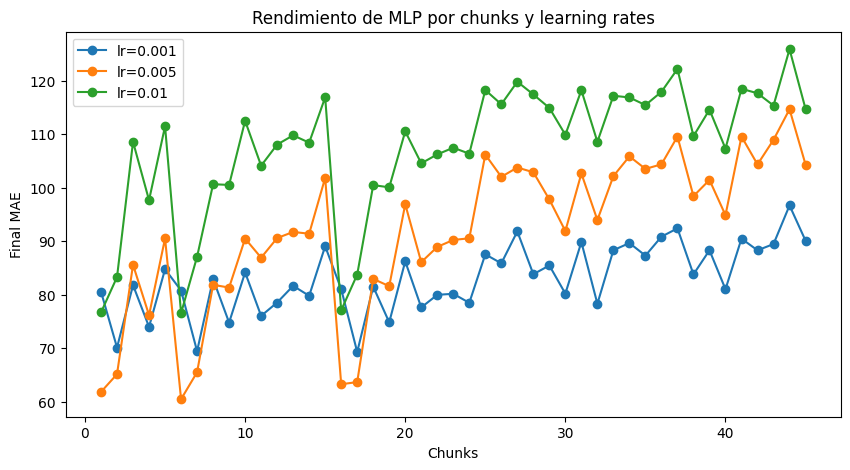

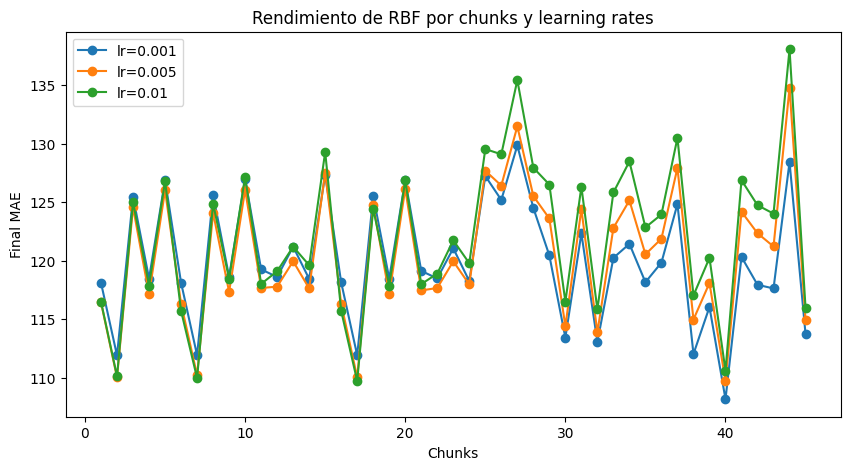

'\n# Entrenar modelos por chunks\nfor i, chunk in enumerate(chunks):\n    print(f"Entrenando con chunk {i+1}/10")\n    X_train, X_test, y_train, y_test = preprocess_data(chunk)\n    input_dim = X_train.shape[1]\n    \n    # Entrenar MLP\n    mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)\n    mlp_loss, mlp_mae = mlp_model.evaluate(X_test, y_test, verbose=0)\n    MLP_results.append(mlp_mae)\n    print("MLP entrenado")\n    \n    # Entrenar RBF\n    rbf_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)\n    rbf_loss, rbf_mae = rbf_model.evaluate(X_test, y_test, verbose=0)\n    RBF_results.append(rbf_mae)\n    print("RBF entrenado")\n\nfor i, (mlp_mae, rbf_mae) in enumerate(zip(MLP_results, RBF_results)):\n    print(f"Chunk {i+1}: MLP MAE = {mlp_mae:.4f}, RBF MAE = {rbf_mae:.4f}")\n\n'

In [ ]:
learning_rates = [0.001, 0.005, 0.01]
mlp_history = {lr: [] for lr in learning_rates}
rbf_history = {lr: [] for lr in learning_rates}

for lr in learning_rates:
    print(f"Entrenando con learning rate = {lr}")

    for chunks in data_sizes:
        print(f"Entrenando con dataset de tamaño {len(chunks) * len(chunks[0])}")
        mlp_model = None
        rbf_model = None

        for i, chunk in enumerate(chunks):
            print(f"Chunk {i+1}/{len(chunks)}")
            X_train, X_test, y_train, y_test = preprocess_data(chunk)
            input_dim = X_train.shape[1]

            # Entrenar MLP
            if mlp_model is None:
                mlp_model = create_mlp_model(input_dim)
                mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss="mean_squared_error", metrics=["mae"])
            history_mlp = mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
            mlp_history[lr].append(history_mlp.history)

            # Entrenar RBF
            if rbf_model is None:
                rbf_model = create_rbf_model(input_dim)
                rbf_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss="mean_squared_error", metrics=["mae"])
            history_rbf = rbf_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
            rbf_history[lr].append(history_rbf.history)

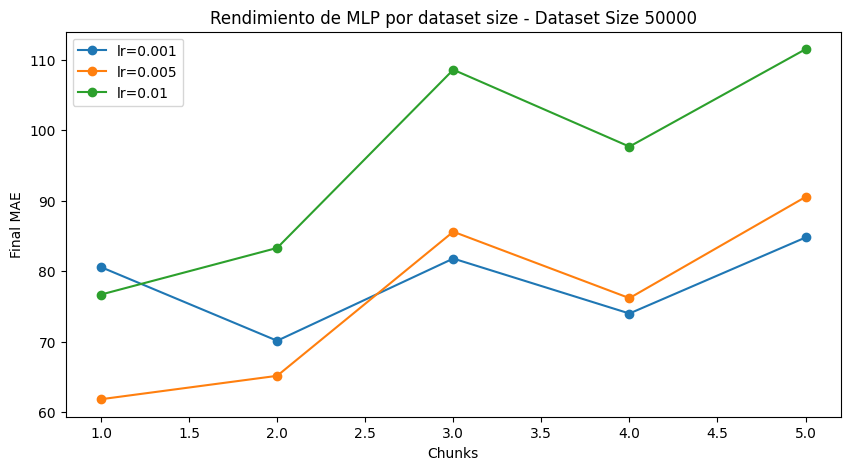

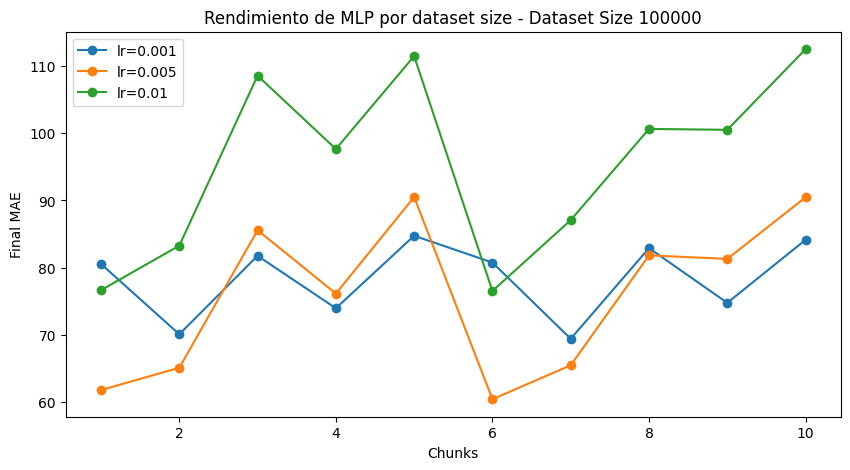

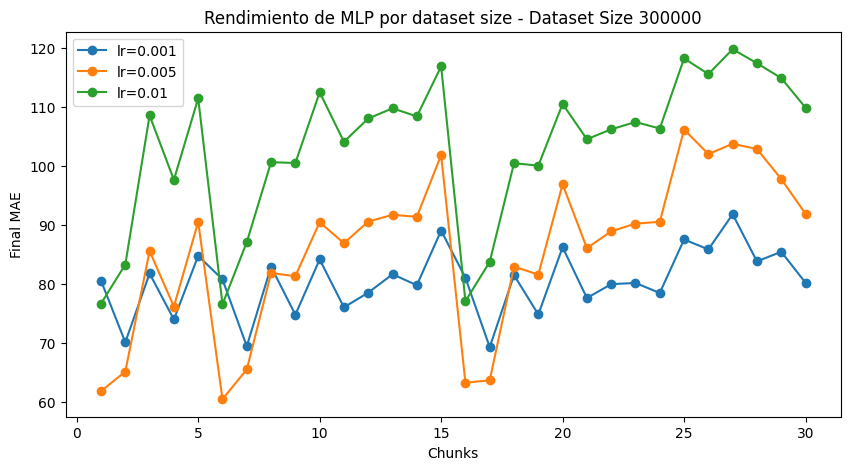

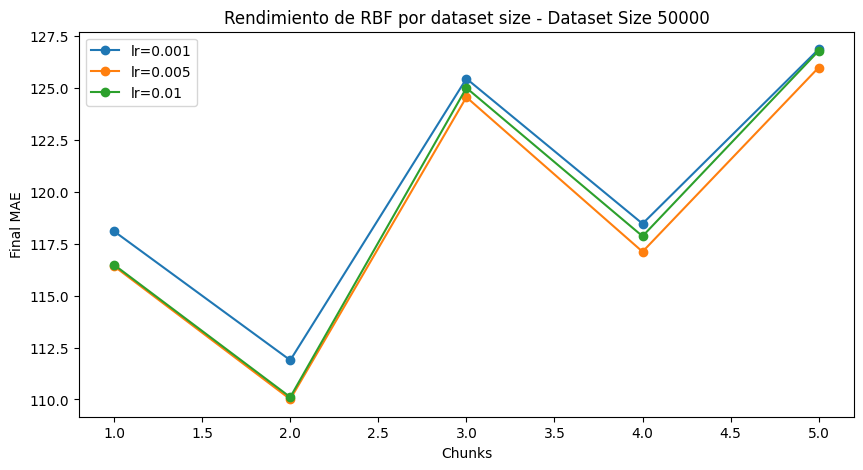

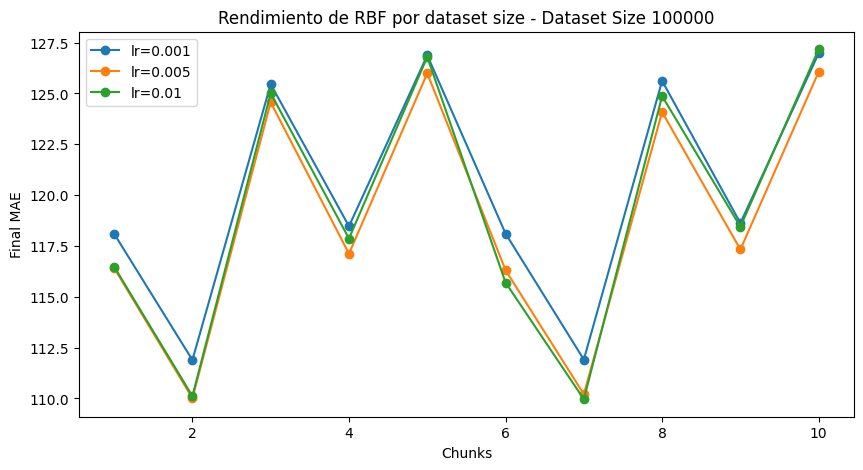

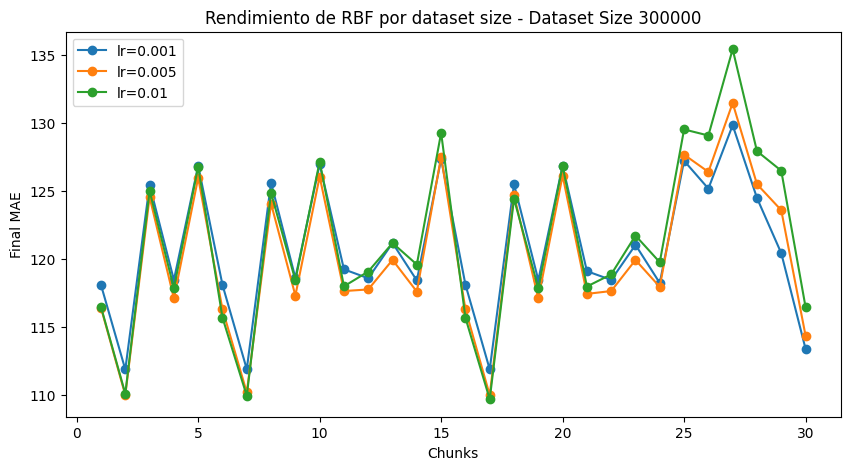

In [ ]:
# Visualizar rendimiento
def plot_histories_by_dataset_size(histories, title):
    dataset_sizes = [50000, 100000, 300000]
    for dataset_size in dataset_sizes:
        plt.figure(figsize=(10, 5))
        for lr, history_list in histories.items():
            chunks_per_size = {50000: 5, 100000: 10, 300000: 30}
            mae_per_chunk = [history['mae'][-1] for history in history_list[:chunks_per_size[dataset_size]]]
            plt.plot(range(1, len(mae_per_chunk) + 1), mae_per_chunk, marker='o', label=f'lr={lr}')
        plt.xlabel("Chunks")
        plt.ylabel("Final MAE")
        plt.title(f"{title} - Dataset Size {dataset_size}")
        plt.legend()
        plt.show()

plot_histories_by_dataset_size(mlp_history, "Rendimiento de MLP por dataset size")
plot_histories_by_dataset_size(rbf_history, "Rendimiento de RBF por dataset size")